# Make plots based On Makino et al. 2015

Idea right now is to show that most change happens very rapidly as in Makino, and after controlling for running the mismatch we see at reversal actually appears to be very modest. Most changes in the POR network occur within days of starting learning.

- Should align to naive
- otherwise it is worth thinking about the days lost to training days with only 1 or two cues
- Most of the effect in Makino comes in teh first day or two
- Show first 10 days of training (can split in half) to mimic Makino

This dovetails nicely with stability of representaion across a huge range of behavior being a main point.

In [1]:
%load_ext autoreload
%autoreload 2
import cascade as cas
import flow
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd
import warnings
from cascade import utils
from scipy.stats import pearsonr
from copy import deepcopy

## load

In [5]:
# set parameters
mice = cas.lookups.mice['all12']
# words = ['facilitate'] * len(mice)
words = ['signals' if s in 'OA27' else 'answered' for s in mice]
group_by = 'all3'

rank_level_sort = 15

# load in a full size tensor
model_list = []
tensor_list = []
id_list = []
bhv_list = []
meta_list = []
for mouse, word in zip(mice, words):
    
    # return   model, ids, tensor, meta, bhv
    out = cas.load.load_all_groupday(mouse, word=word, with_model=True, group_by=group_by, nan_thresh=0.95)
    sorted_model, sort_order = utils.sortfactors(out[0])
    model_list.append(sorted_model)
    tensor_list.append(out[2][sort_order[rank_level_sort - 1], :, :])
    id_list.append(out[1][sort_order[rank_level_sort - 1]])
    bhv_list.append(out[4])
    meta_list.append(utils.add_stages_to_meta(out[3], 'parsed_11stage'))

Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match le

## get all relevant tuning dfs for mice

In [6]:
tuning_list = []
for meta, tensor, model in zip(meta_list, tensor_list, model_list):
    df = cas.tuning.cell_tuning(meta, tensor, model, 15, by_stage=True, staging='parsed_11stage', tuning_type='cond')
    tuning_list.append(df)

tuning_list_init = []
for meta, tensor, model in zip(meta_list, tensor_list, model_list):
    df = cas.tuning.cell_tuning(meta, tensor, model, 15, by_stage=True, staging='parsed_11stage', tuning_type='initial')
    tuning_list_init.append(df)
    
tuning_list_LR = []
for meta, tensor, model in zip(meta_list, tensor_list, model_list):
    df = cas.tuning.cell_tuning(meta, tensor, model, 15, by_stage=False, by_reversal=True, staging='parsed_11stage', tuning_type='cond')
    tuning_list_LR.append(df)

s:\twophoton_analysis\code\cascade\cascade\utils.py:1506: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\tuning.py:72: RuntimeWarning: Mean of empty slice
  trial_avg_vec = np.nanmean(cell_mat, axis=0)
s:\twophoton_analysis\code\cascade\cascade\tuning.py:350: RuntimeWarning: Mean of empty slice
  mean_cue.append(np.nanmean(rect_trial_avg_vec[cue_boo]))
s:\twophoton_analysis\code\cascade\cascade\tuning.py:402: RuntimeWarning: Mean of empty slice
  mean_cue.append(np.nanmean(rect_trial_avg_vec[cue_boo]))


In [12]:
tuning_list[0].head()

parsed_11stage preferred tuning  \
mouse cell_n                                   
AS20  1         L1 learning            broad   
      1        L1 reversal1            broad   
      1         L2 learning            broad   
      1        L2 reversal1            broad   
      1         L3 learning    minus-neutral   

                                                  cosine tuning  \
mouse cell_n                                                      
AS20  1       [0.48261749347515115, 0.40849829891562917, 0.3...   
      1       [0.3506102183317794, 0.5569483176757555, 0.381...   
      1       [0.4505678120983245, 0.4094993366192555, 0.408...   
      1       [0.4838967968607125, 0.512702016269704, 0.2956...   
      1       [0.23467211312340786, 0.4278129111355462, 0.70...   

                                                  mean response  \
mouse cell_n                                                      
AS20  1       [0.5834038677467408, 0.6900972572976367, 0.698...   
      1       [0.8950015554916242, 0.5965929267249567, 0.855...   
      1       [1.5283648818611675, 1.6363324256644496, 1.654...   
      1       [0.501465534921944, 0.5469005769796609, 0.8618...   
      1       [1.686673818333958, 1.2269182237172855, 0.6041...   

              best component  offset component  offset cell  \
mouse cell_n                                                  
AS20  1                  1.0               1.0         True   
      1                  1.0               1.0         True   
      1                  1.0               1.0         True   
      1                  1.0               1.0         True   
      1                  1.0               1.0         True   

              component participation  offset participation  
mouse cell_n                                                 
AS20  1                             2                  True  
      1                             2                  True  
      1                             2                  True  
      1                             2                  True  
      1                             2                  True

In [ ]:
# get mean for initial preferred cue from LR for each cell

In [78]:
staging = cas.lookups.staging['parsed_11stage']

mean_stage_mats = []
for meta, tensor, model, lr_t, init_t in zip(meta_list, tensor_list, model_list, tuning_list_LR, tuning_list_init):
    
    # get preferred tuning 
    lr_t_learning = lr_t.loc[lr_t.staging_LR.isin(['learning'])]
    best_pre_rev_cue = lr_t_learning['cosine tuning'].apply(lambda x: np.argmin(x)).reset_index()
    
    # reset so you can parse cells
    init_t = init_t.reset_index()

    # [M N P]
    new_mat = np.zeros((tensor.shape[0], 11, 3)) + np.nan
    for c, sti in enumerate(staging):
                        
        current_stage = init_t['parsed_11stage'].isin([sti]).values
        
        bcounter = 0
        ocounter = 0
        for celli in range(tensor.shape[0]):
            
            # get tuning (initial condition) defined by LR tuning during learning (condition)
            current_cell = best_pre_rev_cue.cell_n.isin([celli+1]).values
            best_tune_ind = best_pre_rev_cue.loc[current_cell, 'cosine tuning'].values # P M N preferred ind for cell
            
            # skip cell if it is broadly tuned for L
            if lr_t_learning.loc[current_cell, :]['preferred tuning'].values[0] == 'broad':
                bcounter += 1
                continue
            
            # for current stage pick cell
            current_cell_wvals = init_t.cell_n.isin([celli+1]).values
            cell_and_stage_of_interest = init_t.loc[(current_cell_wvals & current_stage), :]
            
            # if there is no cell for this stage skip
            if len (cell_and_stage_of_interest) == 0:
                continue
            
            # remove offset cells
            if cell_and_stage_of_interest['offset cell'].values[0]:
                ocounter += 1
                continue
            
            # use ind for LR to pick preferred firing
            best_mean = cell_and_stage_of_interest['mean response'].values[0][best_tune_ind]
                        
            new_mat[celli, c, best_tune_ind] = best_mean
                        
        print(f'{sti}: {bcounter} broad cells skipped, {ocounter} offset cells skipped.')
    mean_stage_mats.append(new_mat)
    print(f' \n ')

L0 naive: 132 broad cells skipped, 0 offset cells skipped.
L1 learning: 132 broad cells skipped, 83 offset cells skipped.
L2 learning: 132 broad cells skipped, 83 offset cells skipped.
L3 learning: 132 broad cells skipped, 83 offset cells skipped.
L4 learning: 132 broad cells skipped, 83 offset cells skipped.
L5 learning: 132 broad cells skipped, 83 offset cells skipped.
L1 reversal1: 132 broad cells skipped, 83 offset cells skipped.
L2 reversal1: 132 broad cells skipped, 83 offset cells skipped.
L3 reversal1: 132 broad cells skipped, 83 offset cells skipped.
L4 reversal1: 132 broad cells skipped, 83 offset cells skipped.
L5 reversal1: 132 broad cells skipped, 83 offset cells skipped.
 
 
L0 naive: 152 broad cells skipped, 0 offset cells skipped.
L1 learning: 152 broad cells skipped, 49 offset cells skipped.
L2 learning: 152 broad cells skipped, 49 offset cells skipped.
L3 learning: 152 broad cells skipped, 49 offset cells skipped.
L4 learning: 152 broad cells skipped, 49 offset cells 

In [39]:
cell_and_stage_of_interest['mean response'].values[0][0]

0.5834038677467408

<AxesSubplot:>

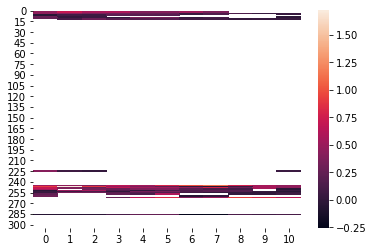

In [79]:
sns.heatmap(new_mat[:, :, 0])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel 

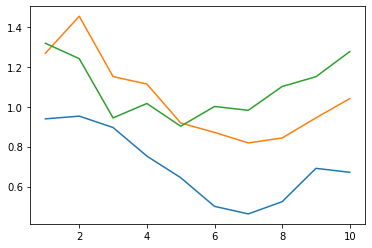

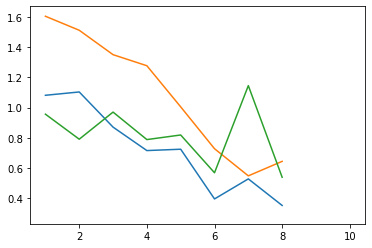

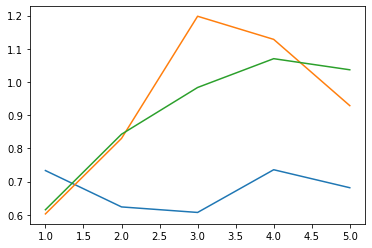

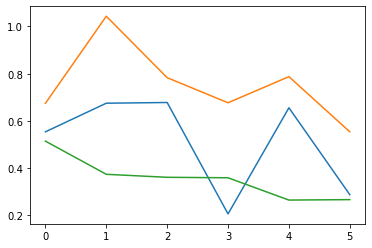

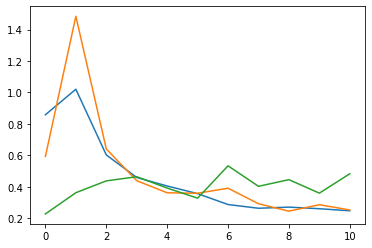

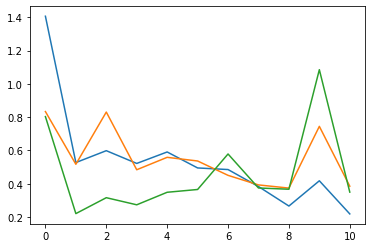

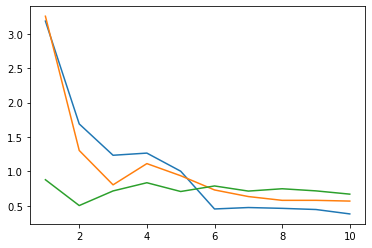

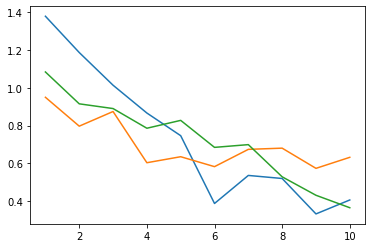

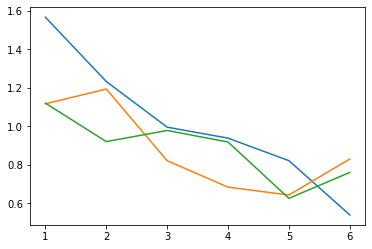

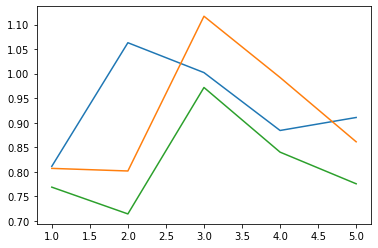

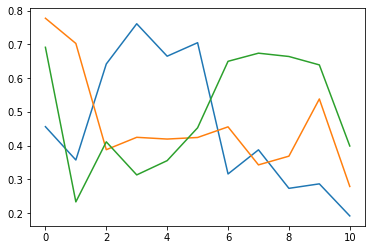

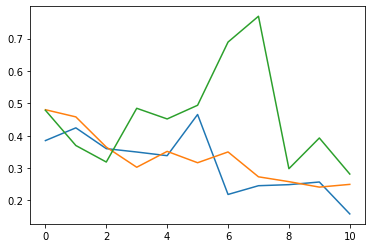

In [80]:
for new_mat in mean_stage_mats:
    plt.figure()
    plt.plot(np.nanmean(new_mat, axis=0))

In [ ]:
## normalize based on naive stage

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


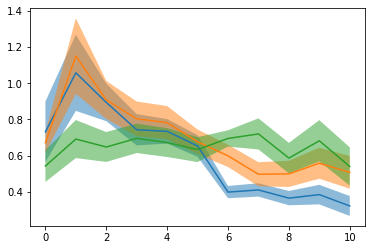

In [89]:
norm_mats = []
for new_mat in mean_stage_mats:
    norm_mat = new_mat #- new_mat[:, 1, :][:, None, :]
    norm_mats.append(norm_mat)

join_list = []
for n_mat in norm_mats:
    join_list.append(np.nanmean(n_mat, axis=0)[:, :, None])
all_mice_mean_resp_change = np.concatenate(join_list, axis=2)

mean_mice = np.nanmean(all_mice_mean_resp_change, axis=2)
sem_mice = np.nanstd(all_mice_mean_resp_change, axis=2)/np.sqrt(np.sum(~np.isnan(all_mice_mean_resp_change), axis=2))

xx = np.ones((11, 3)) * np.arange(11)[:, None]

plt.plot(xx, mean_mice)
for cue in range(3):
    plt.fill_between(xx[:, cue], (mean_mice-sem_mice)[:, cue], (mean_mice+sem_mice)[:, cue], alpha=0.5)
    # ax[0].set_ylabel('phase shift (seconds)')
# ax[0].set_xlabel('learning stage lag')
# ax[0].set_title('All stages')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel 

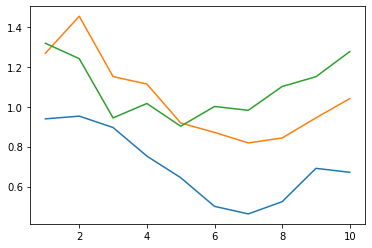

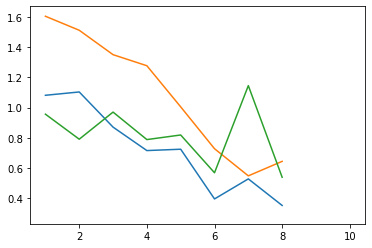

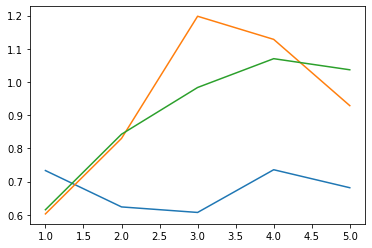

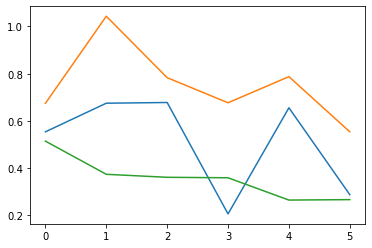

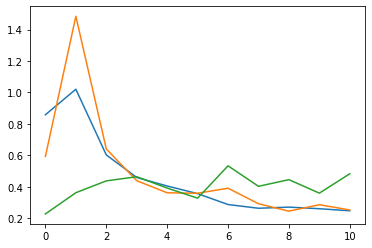

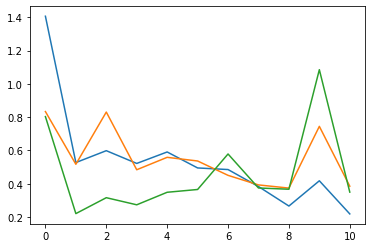

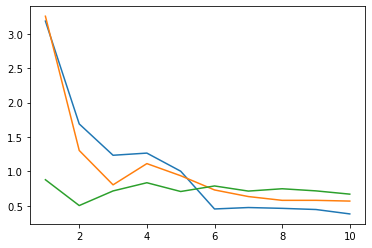

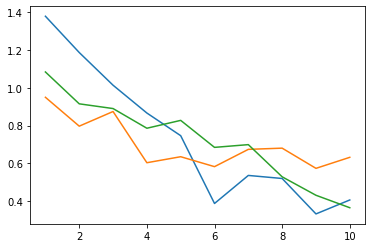

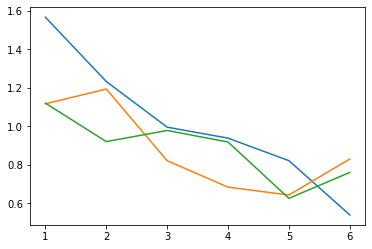

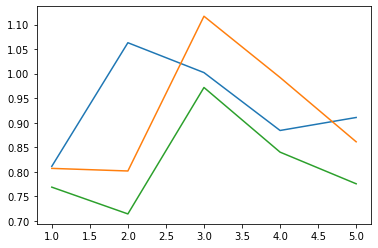

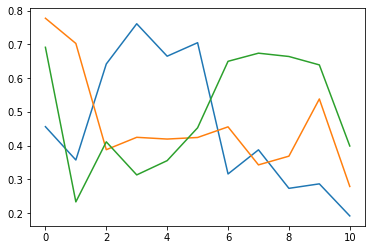

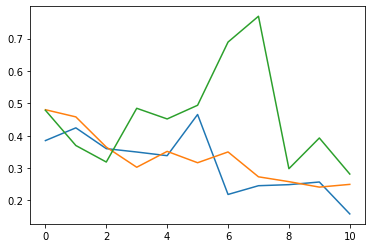

In [90]:
for n_mat in norm_mats:
    plt.figure()
    plt.plot(np.nanmean(n_mat, axis=0))

In [ ]:
## I think I need to control even more for running
- all_behaviors_list = (
        pupil_traces, dpupil_traces,
        lick_traces, dlick_traces,
        speed_traces, dspeed_traces,
        neuropil_traces, dneuropil_traces)

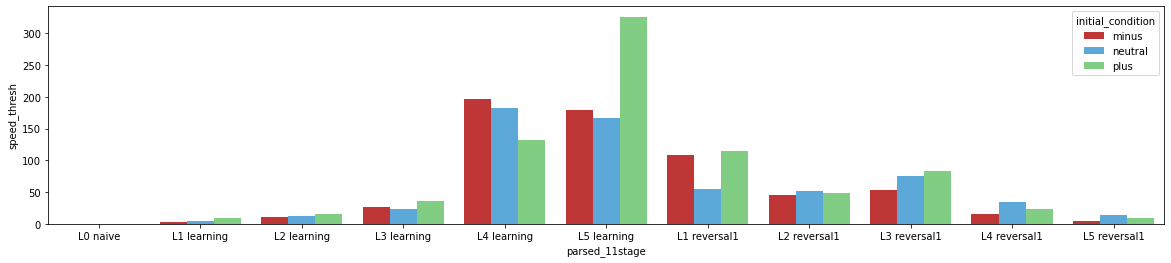

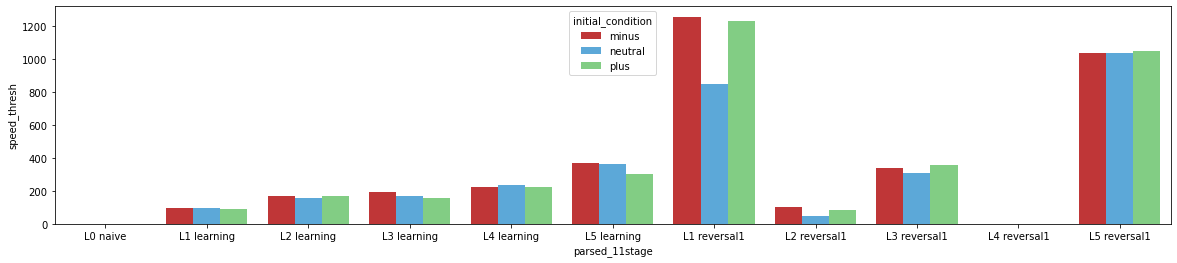

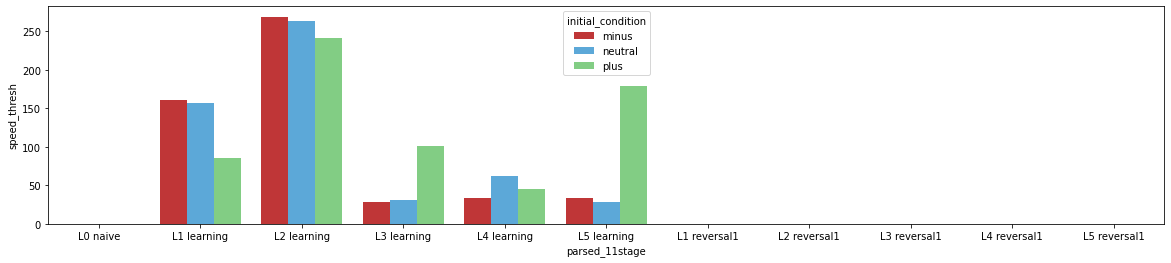

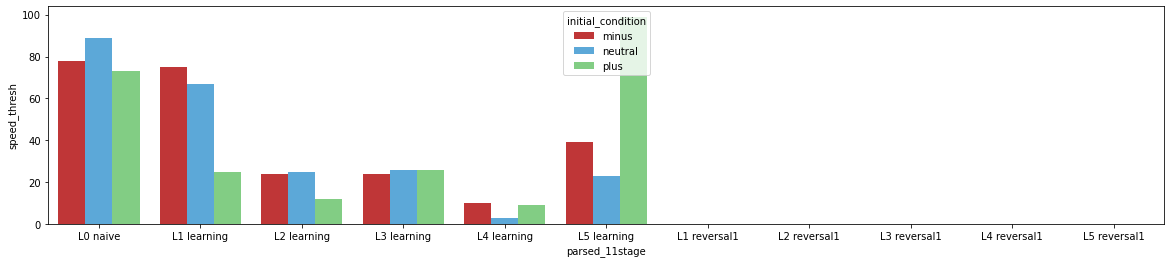

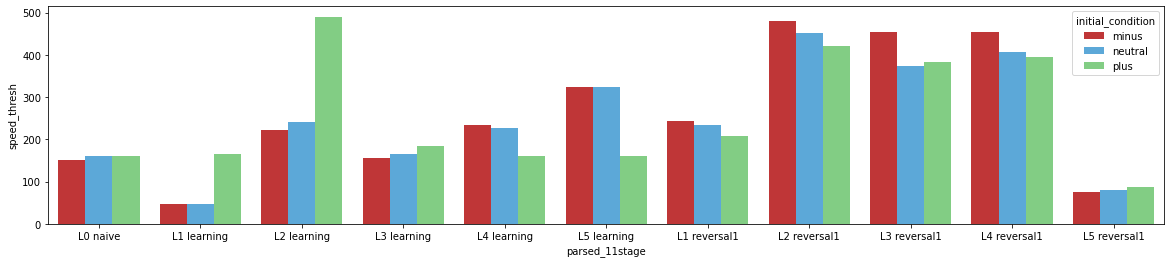

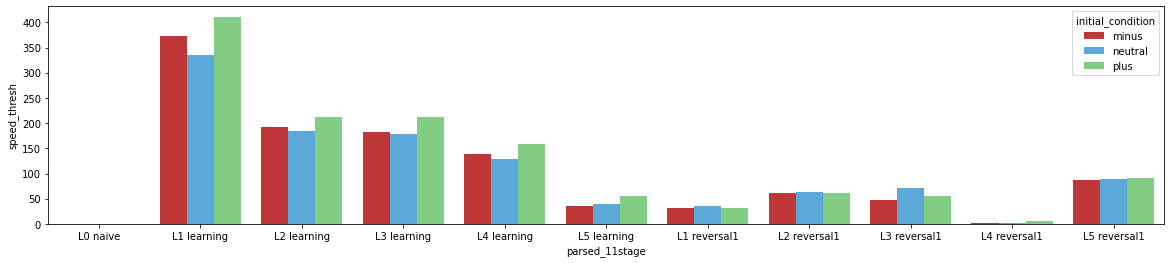

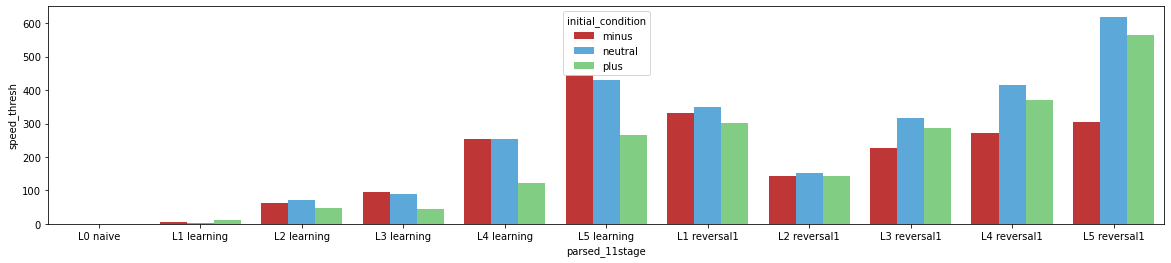

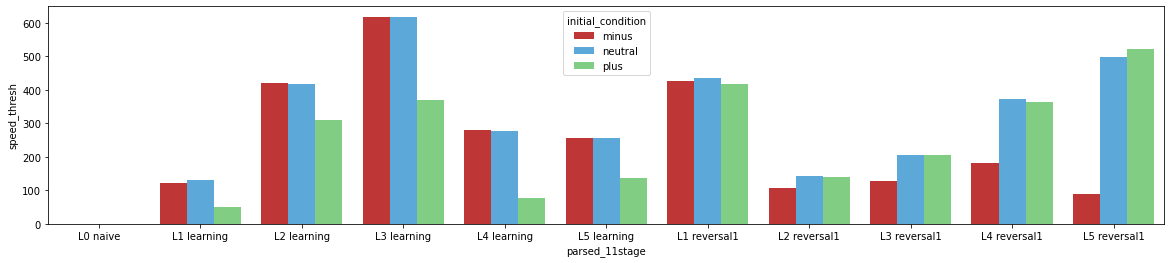

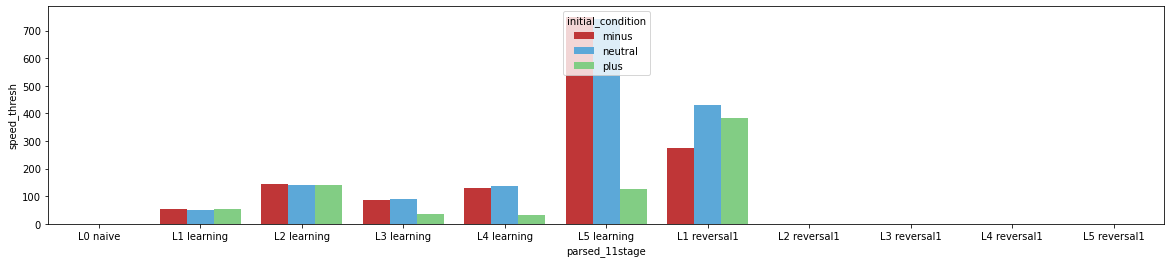

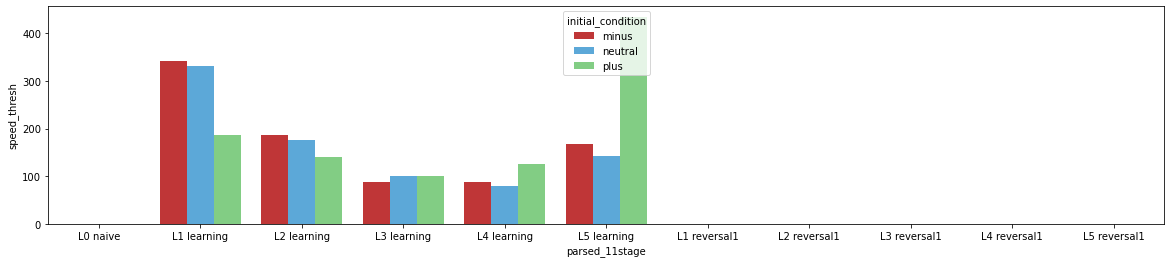

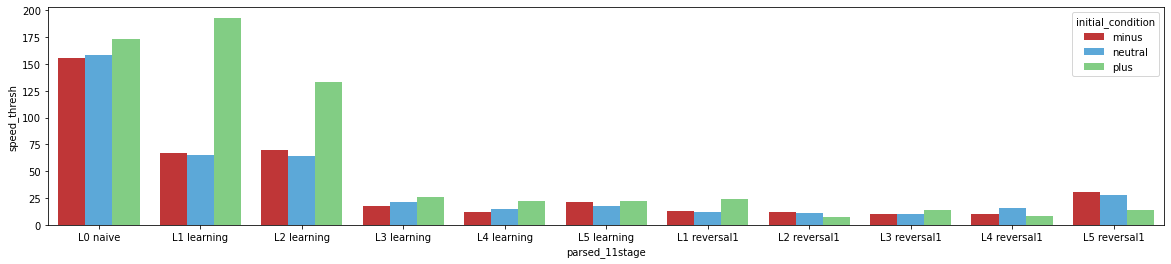

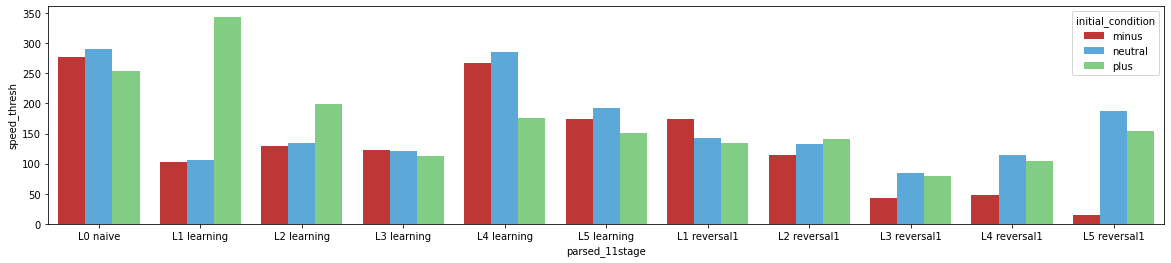

In [137]:
for meta in meta_list:
    meta = deepcopy(meta)
    meta['speed_thresh'] = meta.speed.values <= 5
#     meta.groupby(['parsed_11stage', 'initial_condition']).sum()['speed_thresh']
    plt.figure(figsize=(20,4))
    sns.barplot(data=meta.groupby(['parsed_11stage', 'initial_condition']).sum().reset_index(),
            x='parsed_11stage', y='speed_thresh', hue='initial_condition', palette=cas.lookups.color_dict,
            order=cas.lookups.staging['parsed_11stage'])

<AxesSubplot:xlabel='parsed_11stage', ylabel='speed_thresh'>

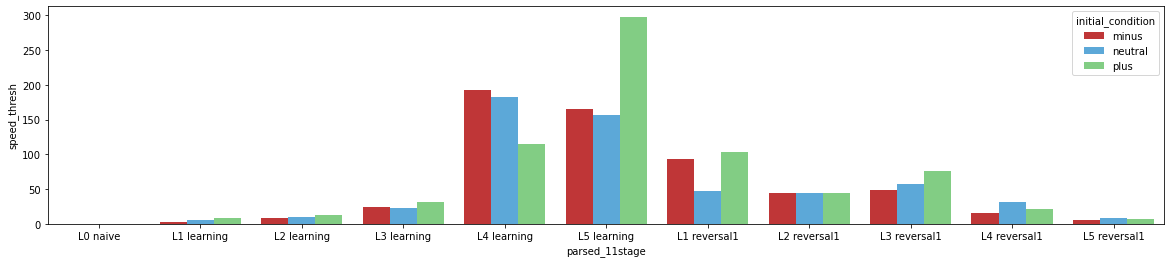

In [133]:
plt.figure(figsize=(20,4))
sns.barplot(data=meta.groupby(['parsed_11stage', 'initial_condition']).sum().reset_index(),
            x='parsed_11stage', y='speed_thresh', hue='initial_condition', palette=cas.lookups.color_dict,
            order=cas.lookups.staging['parsed_11stage'])

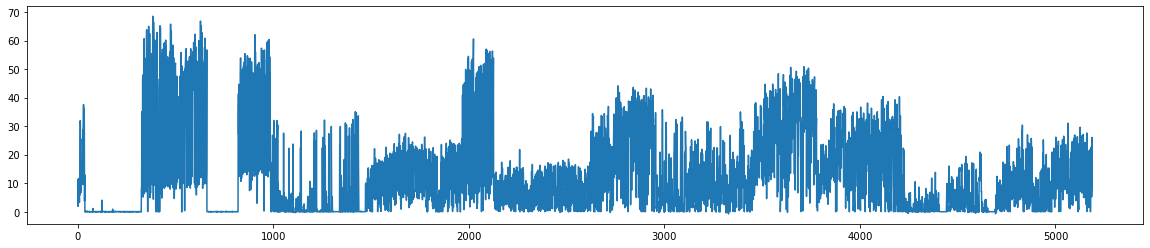

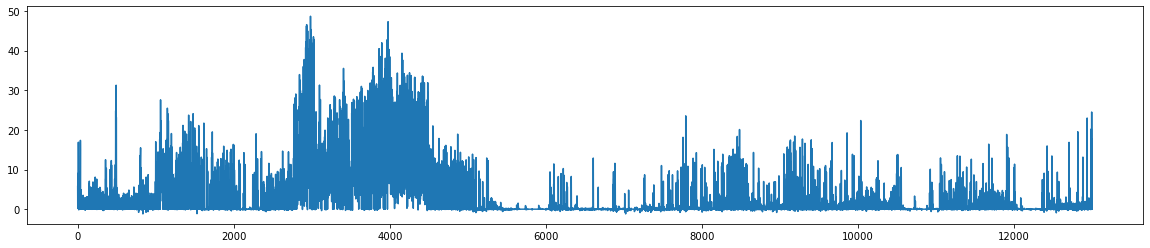

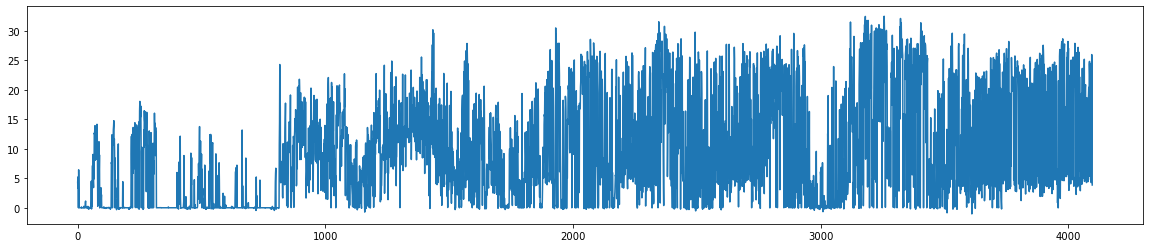

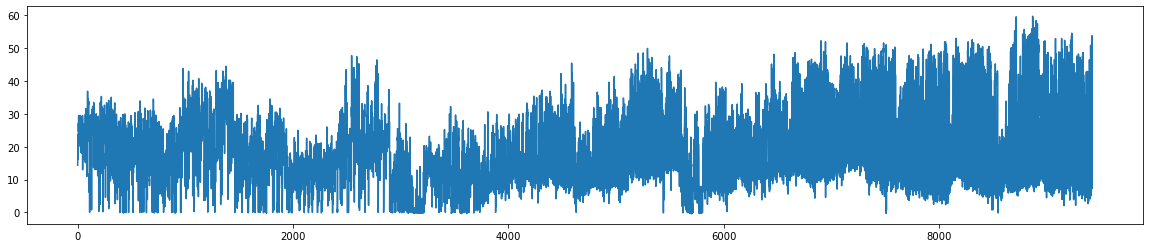

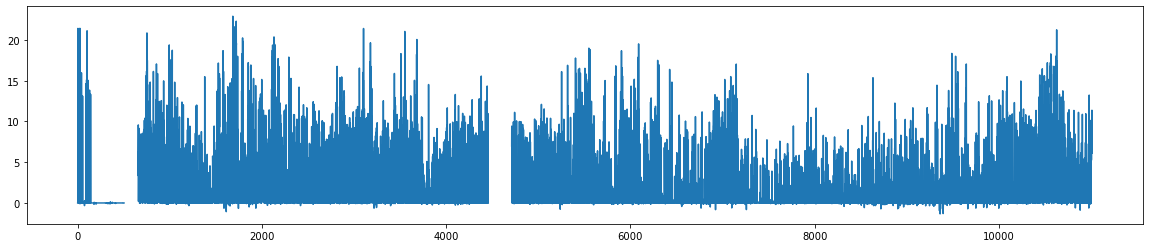

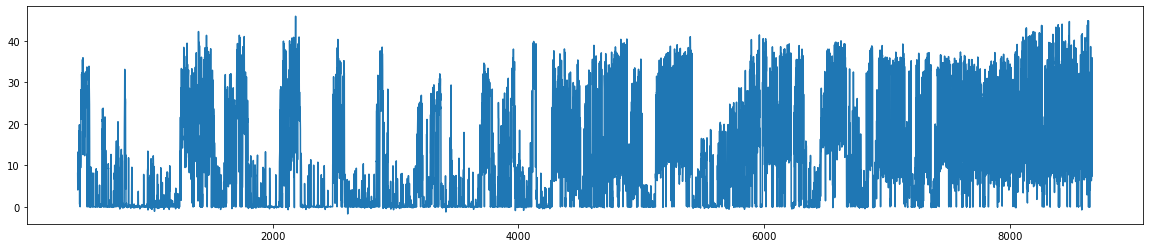

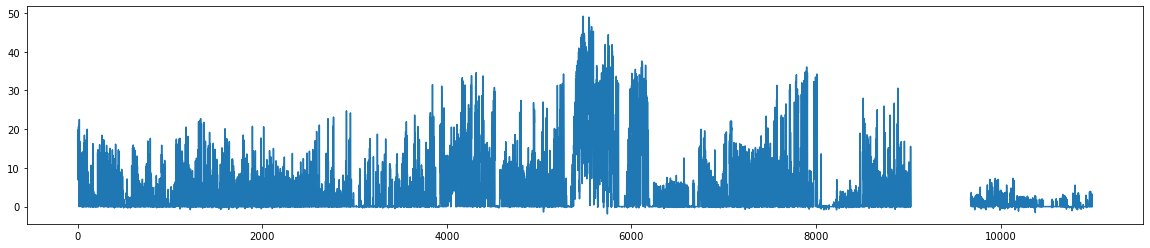

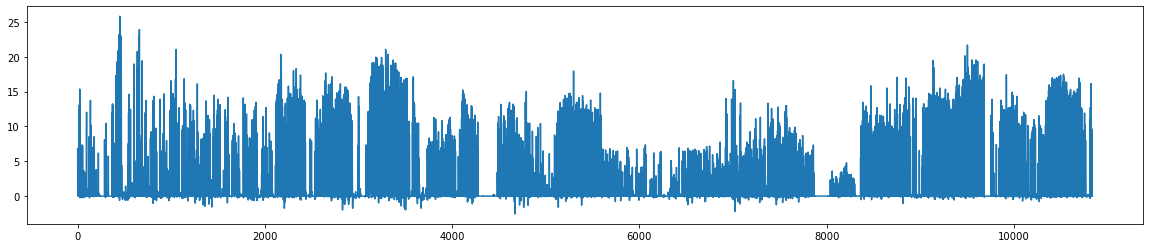

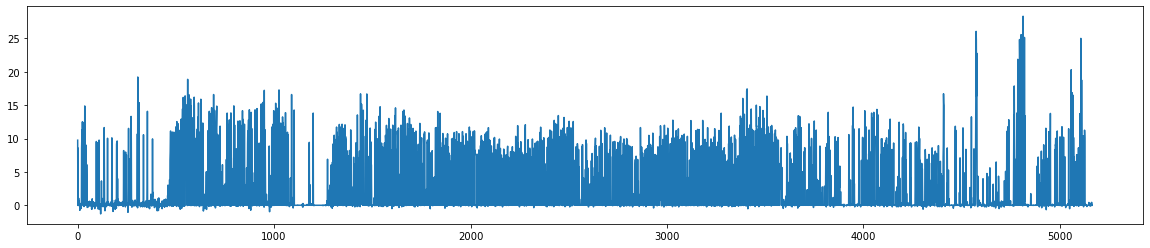

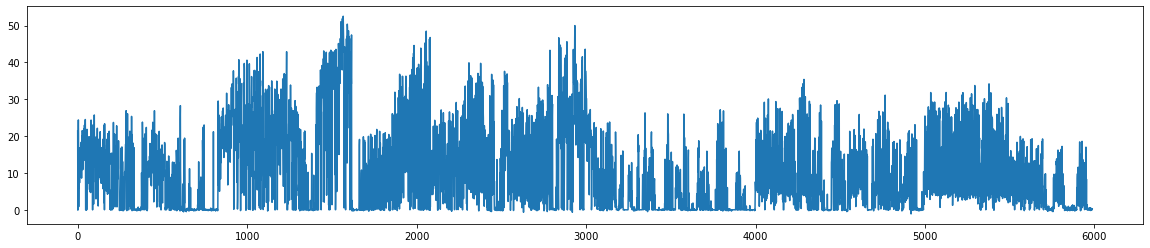

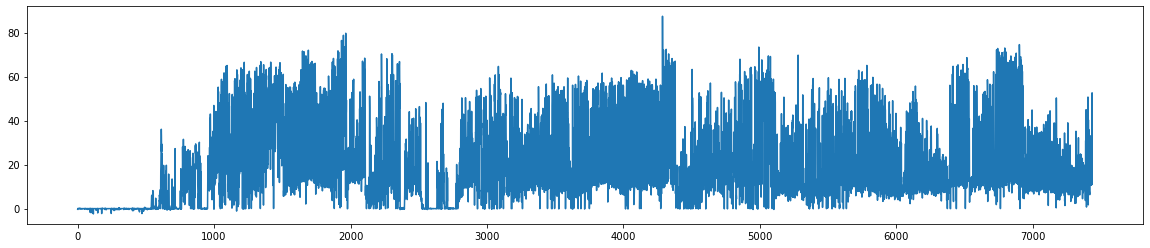

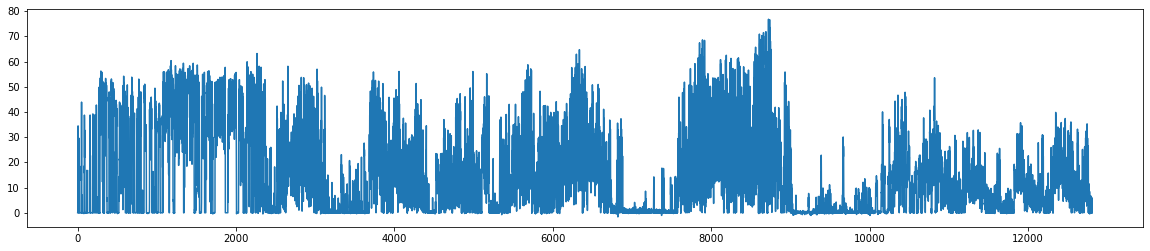

In [107]:
# plt.figure(figsize=(20,4))
for meta in meta_list:
    plt.figure(figsize=(20,4))
    plt.plot(meta.speed.values) 
    

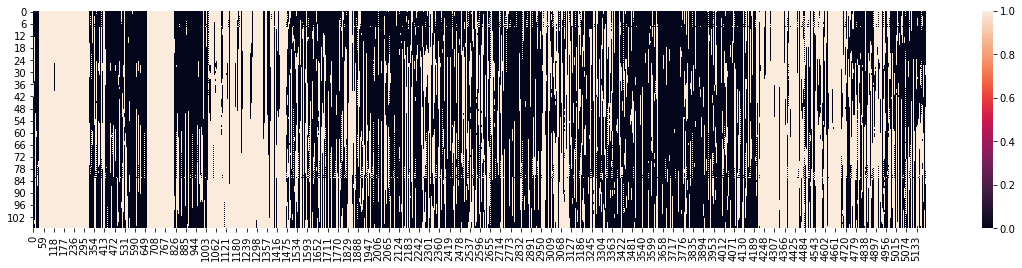

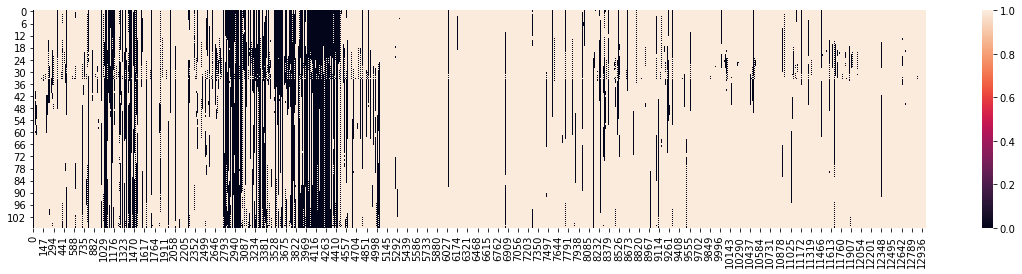

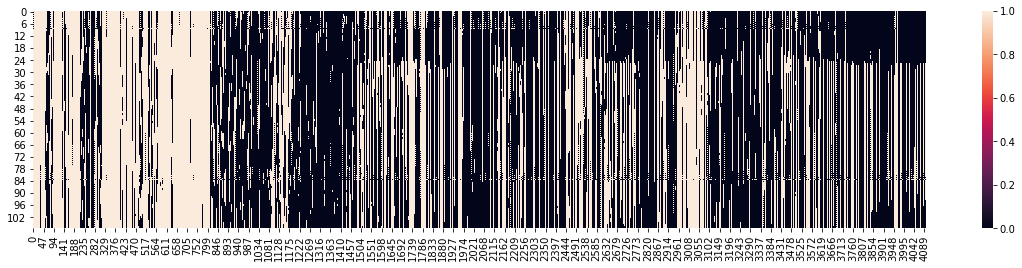

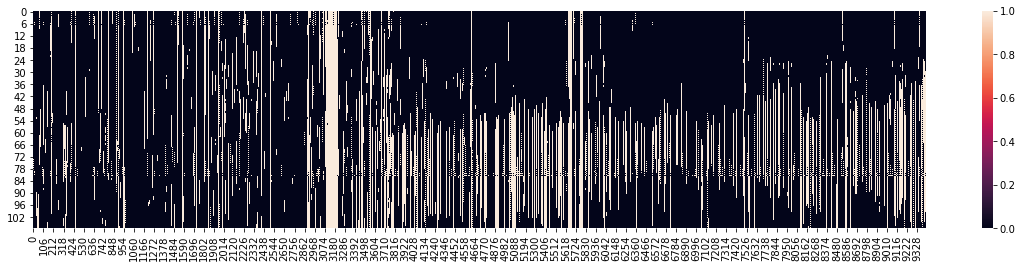

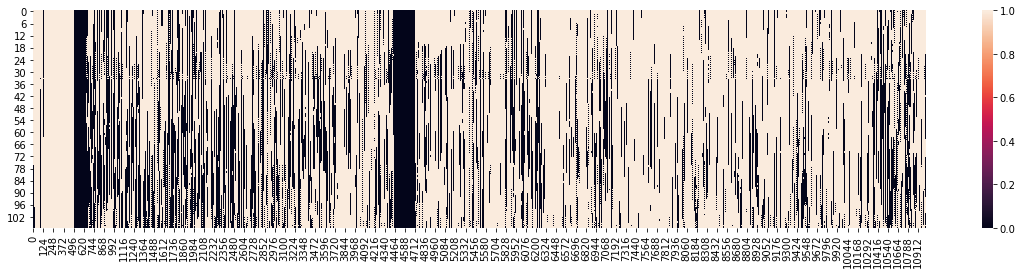

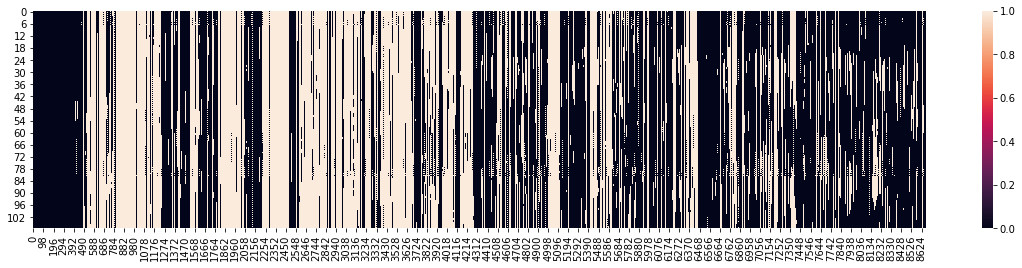

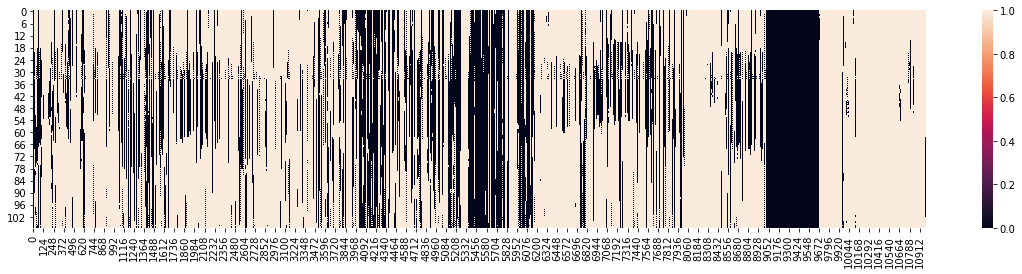

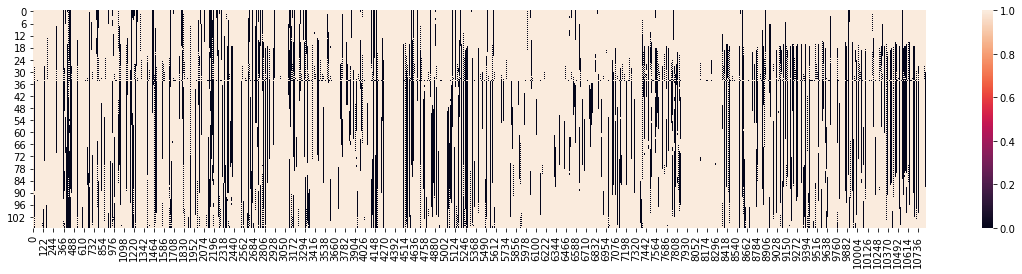

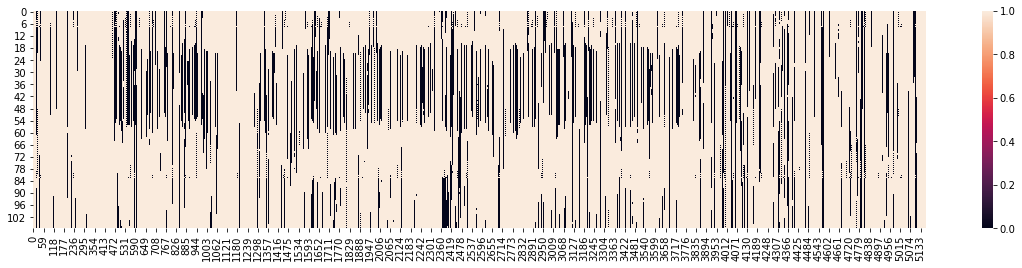

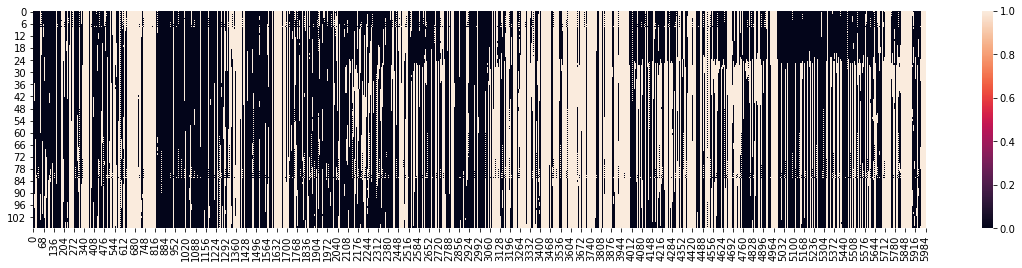

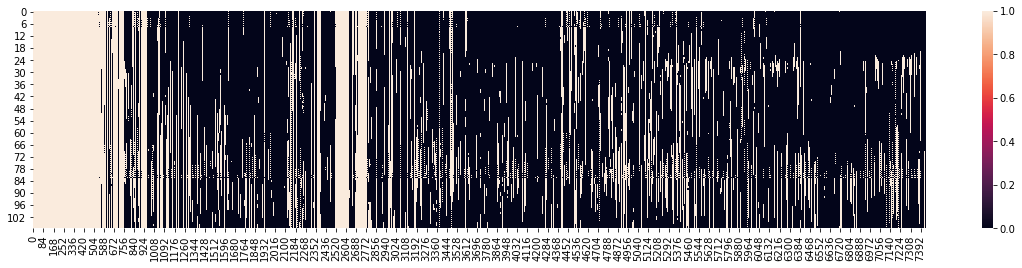

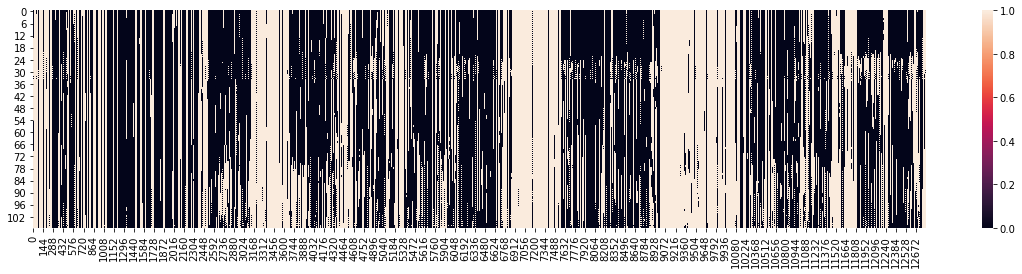

In [103]:
for bhv in bhv_list:
    plt.figure(figsize=(20,4))
    sns.heatmap(bhv[4, :, :] <=4) 

In [ ]:
def get_run_mask(bhv, tensor, buffer_frames=1):
    """
    Create a boolean mask in the shape of your tensor that is 1 wherever data preceded
    a lick and is 0 following licks. Trials with no licking during the stimulus
    window are set to the median lick latency on plus trials.

    :param buffer_frames: int, number of frames to buffer preceding first lick (single frame is ~64.5 ms)
    """

    # make sure that you have a full size 15.5 Hz tensor 
    assert tensor.shape[1] == 108

    # make sure that you have a matching tensor and meta
    assert tensor.shape[2] == len(meta)

    # get lick latency, adjusted with median for trials without licking
    meta = utils.add_firstlick_wmedian_to_meta(meta)
    mask = np.zeros(tensor.shape)
    lick_lat = meta['firstlick_med'].values  # see utils for other options for getting lick latency

    # loop over trials to create your licking mask, setting values to 1
    frame_number = np.arange(tensor.shape[1])
    for tri in range(tensor.shape[2]):
        lick_boo = ((frame_number < lick_lat[tri] - buffer_frames)  # keep frames less than firstlick
                    & (frame_number > 15.5))  # keep frames greater than baseline
        mask[:, lick_boo, tri] = 1

    return mask > 0